In [1]:
import os
os.chdir('..')

In [2]:
from eva5_final.config import Config
from eva5_final.dataset import ComboDataset
import matplotlib.pyplot as plt

In [3]:
d = ComboDataset(Config)
stuff = next(iter(d))

Caching labels data/yolo/labels.npy (3034 found, 0 missing, 169 empty, 0 duplicate, for 3203 images): 100%|██████████| 3203/3203 [00:00<00:00, 12563.76it/s]


In [4]:
stuff[0].shape

(128, 128, 3)

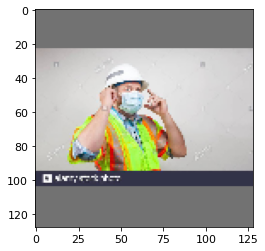

In [5]:
plt.imshow(stuff[0])

In [12]:
print(type(stuff[2]))
len(stuff[2])

<class 'tuple'>


4